In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [205]:
df=pd.read_csv('googleplaystore.csv')

In [206]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# EDA

In [207]:
df.shape

(10841, 13)

we ave almost 10841 rows and 13 columns

In [208]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We have missing values in Rating,Android ver,type,content Rating Columns Will use Imputation to handle the missing data

In [209]:
df=df.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'],axis=0)

 Dropping the column with Null values

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


OBSERVATION:

*We have Float64 and object datatypes in the columns 

*The date column is in object format we have to convert in to int as python can only understad 

# Data Handling:

In [211]:
df['Size_1'] =df.Size.replace(['Varies with device'],[''])
df['Size_1'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size_1, dtype: object

In [212]:
df['Size_2'] =df.Size_1.replace(r'[KM]+$', '', regex=True)
df['Size_2'].head()

0     19
1     14
2    8.7
3     25
4    2.8
Name: Size_2, dtype: object

In [213]:
df['Size_3']=df.Size_1.str.extract(r'[\d\.]+([KM]+)', expand=False).replace(['M'], [10**3])
df['Size_3'].head()

0    1000.0
1    1000.0
2    1000.0
3    1000.0
4    1000.0
Name: Size_3, dtype: float64

In [214]:
df['Size_4']=df['Size'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)
df['Size_4'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size_4, dtype: float64

In [215]:
df['Size_5']=df['Size_4']*df['Size_3']
df['Size_5'].head()

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size_5, dtype: float64

In [216]:
df['Size_5'].isnull().sum()

2006

In [217]:
df['Size_5']=df['Size_5'].fillna(np.mean(df['Size_5']))

In [218]:
df['Size_5'].isnull().sum()

0

Splitting: 
Deleted "Varies with device" text from Size column

Replacing 'M' with ' ' string, e.g '123M' becomes 123 and dropping Nan values.

Some of the data in Size column also contains data like '234K', '765k' which means 'Kb' Kilobytes so this function removes 'k' and than divide this value with 1000 in order to convert it into Mb

# Remove ‘+’, ‘,’ from the field, convert it to integer

In [219]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [220]:
df['Installs_1'] = df['Installs'].replace({'[,+]':''},regex=True)

In [221]:
df['Installs_1'] =df['Installs_1'].astype(int)
df['Installs_1'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs_1, dtype: int32

# Price field is a stringas it  has symbol and convert it to numeric.

In [222]:
df['Price'][220:224]

221    0
222    0
223    0
224    0
Name: Price, dtype: object

In [223]:
type(df['Price'])

pandas.core.series.Series

In [224]:
df['Price_1'] =df['Price'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)$").astype(float)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
 13  Size_1          10829 non-null  object 
 14  Size_2          10829 non-null  object 
 15  Size_3          8823 non-null   float64
 16  Size_4          9135 non-null   float64
 17  Size_5          10829 non-null 

# Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [226]:
max(df['Rating'])

5.0

In [227]:
min(df['Rating'])

1.0

# Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [228]:
df['Reviews_1'] =df['Reviews'].astype(int)
df['Reviews_1'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews_1, dtype: int32

In [229]:
df['Reviews_1'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews_1, dtype: int32

In [230]:
df['rgti'] =df['Reviews_1']>df['Installs_1']
df['rgti'].head()

0    False
1    False
2    False
3    False
4    False
Name: rgti, dtype: bool

In [231]:
df.rgti[df.rgti].index

Int64Index([2454, 4550, 4663, 5812, 5917, 6508, 6700, 7402, 8591, 9096, 10697], dtype='int64')

In [232]:
df2= df.drop([2454, 4550, 4663, 5812, 5917, 6508, 6700, 7402, 8591, 9096, 10697])
df2.rgti[df.rgti].index

Int64Index([], dtype='int64')

There is no rows with tthe above condition

# Univarient Analysis

In [233]:
df2[['Reviews_1']].idxmax()

Reviews_1    2544
dtype: int64

In [234]:
df2.loc[1879]

App               Clash of Clans
Category                    GAME
Rating                       4.6
Reviews                 44893888
Size                         98M
Installs            100,000,000+
Type                        Free
Price                          0
Content Rating      Everyone 10+
Genres                  Strategy
Last Updated       July 15, 2018
Current Ver            10.322.16
Android Ver           4.1 and up
Size_1                       98M
Size_2                        98
Size_3                    1000.0
Size_4                      98.0
Size_5                   98000.0
Installs_1             100000000
Price_1                      0.0
Reviews_1               44893888
rgti                       False
Name: 1879, dtype: object

The highest reviews seem to be of Clash Of Clans app, which is widely used across all age groups and domains, so they seem to be right.

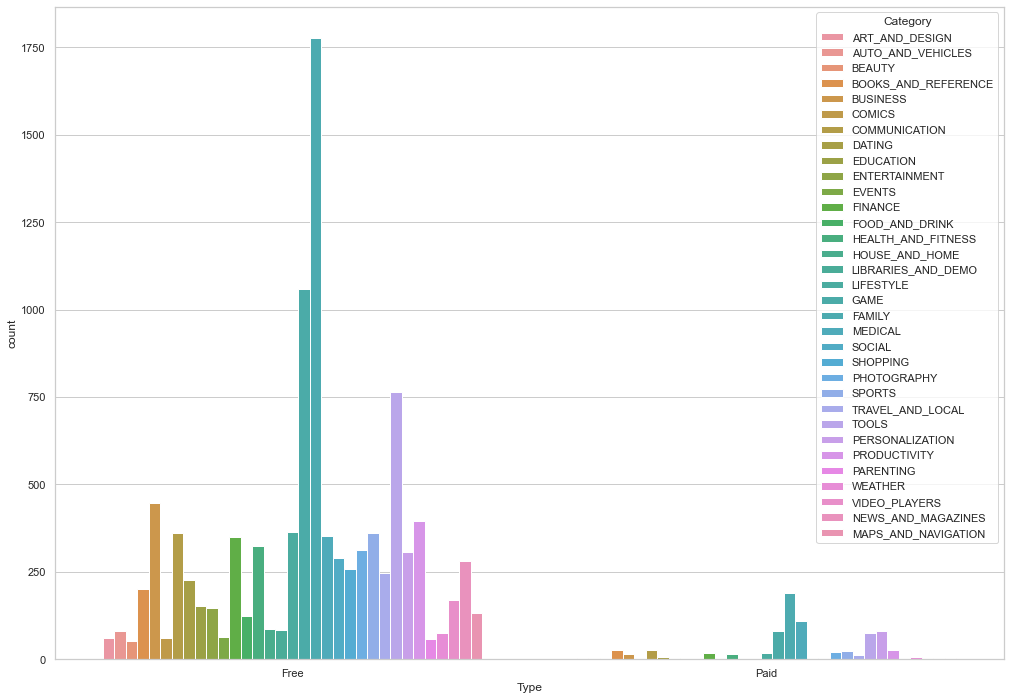

In [235]:
plt.figure(figsize=(17,12))
sns.countplot(x='Type', hue='Category',  data=df2);

THE SOCIAL APPS IS HIGHLY USED APP IN FREE 

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

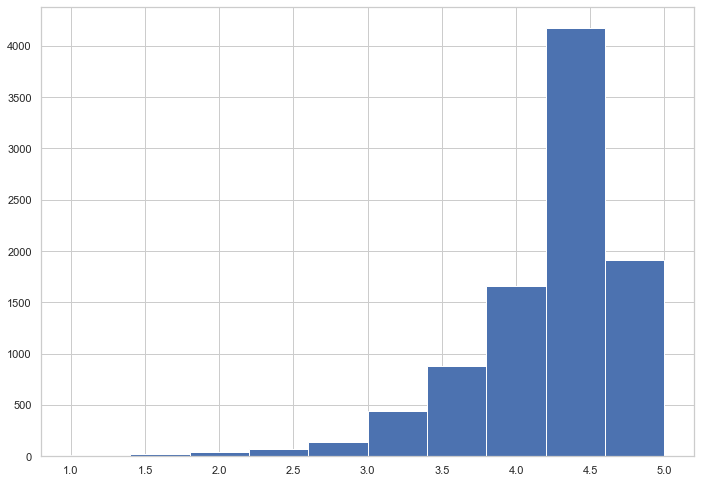

In [236]:
plt.hist(df2['Rating'])

The more Rating is of peak of 4.5

Checking for max price in paid application

In [237]:
max(df2['Price_1'])

400.0

it seems like the value 400 is high for paid apps and im consideringthis as a outliers 

In [238]:
df3= df2[df2['Price_1'] <= 200.00 ]

In [239]:
max(df3['Price_1'])

200.0

# Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [240]:
max(df3['Reviews_1'])

78158306

In [241]:
df4=df3[df3['Reviews_1'] < 2000000]

In [242]:
max(df4['Reviews_1'])

1986068

# Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

In [243]:
print("10th Percentile\n", np.percentile(df4['Installs_1'],q=10))
print("25th Percentile\n", np.percentile(df4['Installs_1'],q=25))
print("50th Percentile\n", np.percentile(df4['Installs_1'],q=50))
print("70th Percentile\n", np.percentile(df4['Installs_1'],q=70))
print("95th Percentile\n", np.percentile(df4['Installs_1'],q=95))
print("99th Percentile\n", np.percentile(df4['Installs_1'],q=99))

10th Percentile
 100.0
25th Percentile
 1000.0
50th Percentile
 100000.0
70th Percentile
 1000000.0
95th Percentile
 10000000.0
99th Percentile
 100000000.0


Decide a threshold as cutoff for outlier and drop records having values more than that

In [244]:
max(df4['Installs_1'])

1000000000

In [245]:
df5=df4[df4['Installs_1'] <= 1000000]

In [246]:
max(df5['Installs_1'])

1000000

# BIVARIENT ANALYSIS

Analysing pricing with target

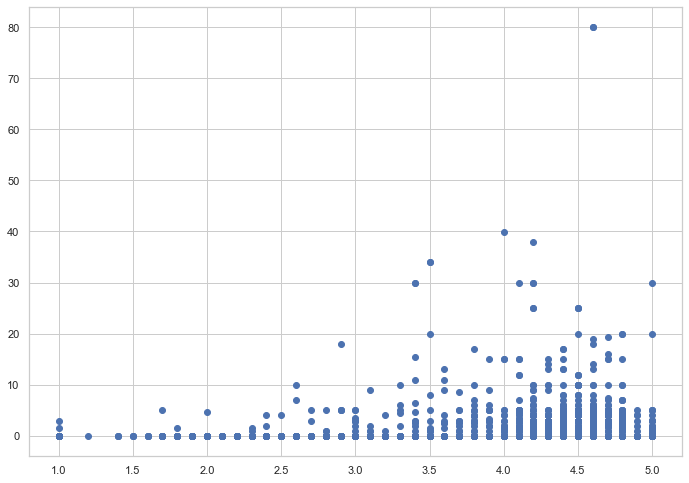

In [247]:
plt.scatter(x=df5['Rating'],y=df5['Price_1'])

From the above scatter plot, ratings seem to increase with price.

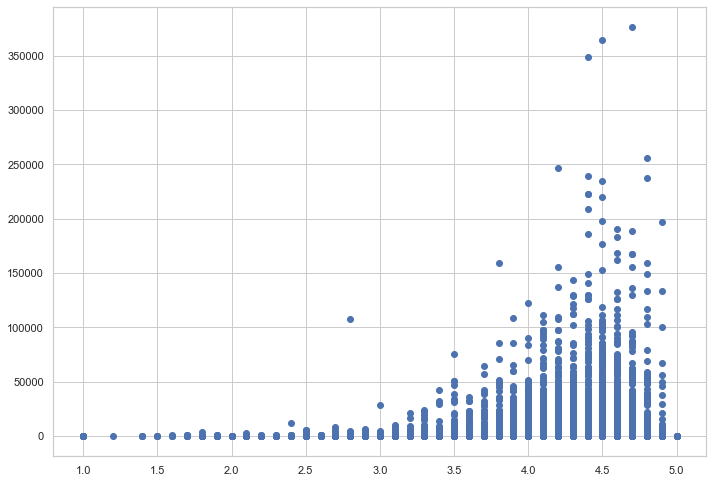

In [248]:
plt.scatter(x=df5['Rating'],y=df5['Reviews_1'])

From the scatter plot above it would appear that more reviews seem to be getting a better rating than lesser rated apps.

# DATA PREPROCESSING

In [249]:
inp1=df5.copy()
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Size_1,Size_2,Size_3,Size_4,Size_5,Installs_1,Price_1,Reviews_1,rgti
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,19M,19,1000.0,19.0,19000.0,10000,0.0,159,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,14M,14,1000.0,14.0,14000.0,500000,0.0,967,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,4.4 and up,2.8M,2.8,1000.0,2.8,2800.0,100000,0.0,967,False
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,...,2.3 and up,5.6M,5.6,1000.0,5.6,5600.0,50000,0.0,167,False
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,19M,19,1000.0,19.0,19000.0,50000,0.0,178,False


COPYING THE DATA 

# Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [250]:
inp1['Reviews_2'] = np.log1p(inp1['Reviews_1'])
inp1['Reviews_2'].head()

0    5.075174
1    6.875232
4    6.875232
5    5.123964
6    5.187386
Name: Reviews_2, dtype: float64

In [251]:
inp1['Installs_2'] = np.log1p(inp1['Installs_1'])
inp1['Installs_2'].head()

0     9.210440
1    13.122365
4    11.512935
5    10.819798
6    10.819798
Name: Installs_2, dtype: float64

In [252]:
inp1['Size_5'] = np.log1p(inp1['Size_5'])
inp1['Size_5'].head()

0    9.852247
1    9.546884
4    7.937732
5    8.630700
6    9.852247
Name: Size_5, dtype: float64

In [50]:
inp1.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Size_2,Size_3,Size_4,Size_5,Installs_1,Price_1,Reviews_1,rgti,Reviews_2,Installs_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,19,1000.0,19.0,9.852247,10000,0.0,159,False,5.075174,9.21044


In [256]:
inp2 = inp1.drop(columns = ['Size_1','Size_2','Size_3','Size_4'])
inp2.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_5,Installs_1,Price_1,Reviews_1,rgti,Reviews_2,Installs_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.852247,10000,0.0,159,False,5.075174,9.21044


Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [257]:
inp3 = inp2.rename(columns={'Size_5':'Size','Price_1':'Price','Reviews_2':'Reviews','Installs_2':'Installs'})

In [258]:
inp3.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size                 0
Installs_1           0
Price                0
Reviews_1            0
rgti                 0
Reviews              0
Installs             0
dtype: int64

In [259]:
inp3=inp3.dropna()

In [260]:
inp3.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size              float64
Installs_1          int32
Price             float64
Reviews_1           int32
rgti                 bool
Reviews           float64
Installs          float64
dtype: object

In [261]:
inp1['Category'].value_counts()

FAMILY                 1586
TOOLS                   652
GAME                    569
MEDICAL                 459
BUSINESS                409
LIFESTYLE               332
FINANCE                 311
PERSONALIZATION         310
PRODUCTIVITY            286
SPORTS                  263
HEALTH_AND_FITNESS      253
NEWS_AND_MAGAZINES      225
COMMUNICATION           220
DATING                  208
BOOKS_AND_REFERENCE     189
SOCIAL                  173
TRAVEL_AND_LOCAL        168
PHOTOGRAPHY             163
SHOPPING                144
VIDEO_PLAYERS           113
MAPS_AND_NAVIGATION     103
EDUCATION               100
FOOD_AND_DRINK           97
AUTO_AND_VEHICLES        80
LIBRARIES_AND_DEMO       78
HOUSE_AND_HOME           72
ENTERTAINMENT            68
EVENTS                   62
PARENTING                58
WEATHER                  58
ART_AND_DESIGN           55
COMICS                   54
BEAUTY                   51
Name: Category, dtype: int64

In [262]:
categories_to_combine = ['BOOKS_AND_REFERENCE','LIBRARIES_AND_DEMO','NEWS_AND_MAGAZINES','EDUCATION','COMICS']
for cat in categories_to_combine:
 inp1['Category'].replace({cat:'BOOKS_AND_EDUCATION'},inplace = True)

In [263]:
categories_to_combine = ['MEDICAL','LIFESTYLE','HEALTH_AND_FITNESS','SPORTS','BEAUTY']
for cat1 in categories_to_combine:
 inp1['Category'].replace({cat1:'HEALTH_AND_FITNESS'},inplace = True)

In [60]:
categories_to_combine = ['DATING','SOCIAL','EVENTS','COMMUNICATION','FAMILY','PARENTING']
for cat2 in categories_to_combine:
 inp1['Category'].replace({cat2:'SOCIAL'},inplace = True)

In [264]:
categories_to_combine = ['GAME','VIDEO_PLAYERS','ENTERTAINMENT']
for cat3 in categories_to_combine:
 inp1['Category'].replace({cat3:'ENTERTAINMENT'},inplace = True)

In [265]:
categories_to_combine = ['BUSINESS','FINANCE','PRODUCTIVITY']
for cat4 in categories_to_combine:
 inp1['Category'].replace({cat4:'BUSINESS'},inplace = True)

In [63]:
categories_to_combine = ['MAPS_AND_NAVIGATION','TRAVEL_AND_LOCAL','FOOD_AND_DRINK','SHOPPING']
for cat5 in categories_to_combine:
 inp1['Category'].replace({cat5:'MAPS_AND_NAVIGATION'},inplace = True)

In [266]:
categories_to_combine = ['PHOTOGRAPHY','ART_AND_DESIGN','HOUSE_AND_HOME','AUTO_AND_VEHICLES']
for cat6 in categories_to_combine:
 inp1['Category'].replace({cat6:'HOBBIES'},inplace = True)

In [267]:
inp1['Category'].value_counts()

FAMILY                 1586
HEALTH_AND_FITNESS     1358
BUSINESS               1006
ENTERTAINMENT           750
TOOLS                   652
BOOKS_AND_EDUCATION     646
HOBBIES                 370
PERSONALIZATION         310
COMMUNICATION           220
DATING                  208
SOCIAL                  173
TRAVEL_AND_LOCAL        168
SHOPPING                144
MAPS_AND_NAVIGATION     103
FOOD_AND_DRINK           97
EVENTS                   62
PARENTING                58
WEATHER                  58
Name: Category, dtype: int64

In [268]:
inp1['Genres'].value_counts()

Tools                          652
Education                      497
Entertainment                  494
Medical                        459
Business                       409
                              ... 
Music & Audio;Music & Video      1
Health & Fitness;Education       1
Parenting;Brain Games            1
Board;Pretend Play               1
Strategy;Creativity              1
Name: Genres, Length: 112, dtype: int64

In [269]:
categories_to_combine=['Books & Reference','Books & Reference;Creativity','Books & Reference;Education','Libraries & Demo','News & Magazines','Education;Education','Education','Education;Creativity','Education;Music & Video','Education;Action & Adventure','Education;Pretend Play','Education;Brain Games','Simulation;Education','Educational;Creativity','Educational;Education','Educational;Brain Games','Educational;Pretend Play','Entertainment;Education','Casual;Education','Educational;Action & Adventure','Health & Fitness;Education','Adventure;Education','Tools;Education','Parenting;Education','Educational','Trivia;Education','Lifestyle;Education','Books & Reference;Education','Puzzle;Education','Role Playing;Education','Strategy;Education','Comics','Comics;Creativity']
for cat in categories_to_combine:
 inp1['Genres'].replace({cat:'Books & Education'},inplace = True)
categories_to_combine=['Medical','Lifestyle;Pretend Play','Health & Fitness','Health & Fitness;Action & Adventure','Sports','Sports;Action & Adventure','Beauty']
for cat1 in categories_to_combine:
 inp1['Genres'].replace({cat1:'Health & Fitness'},inplace = True)
categories_to_combine=['Dating','Social','Events','Communication','Communication;Creativity','Parenting','Parenting;Music & Video','Parenting;Brain Games']
for cat2 in categories_to_combine:
 inp1['Genres'].replace({cat2:'Social'},inplace = True)
categories_to_combine=['Action','Simulation','Casual','Arcade','Role Playing','Puzzle','Adventure','Strategy','Racing','Card','Board','Word','Casino','Trivia','Entertainment;Brain Games','Casual;Brain Games','Puzzle;Brain Games','Casual;Pretend Play','Card;Brain Games','Board;Brain Games','Adventure;Brain Games','Role Playing;Brain Games','Arcade;Action & Adventure','Racing;Action & Adventure','Action;Action & Adventure','Casual;Action & Adventure','Simulation;Pretend Play','Simulation;Action & Adventure','Role Playing;Pretend Play','Adventure;Action & Adventure','Arcade;Action & Adventure','Racing;Action & Adventure','Action;Action & Adventure','Casual;Action & Adventure','Simulation;Pretend Play','Simulation;Action & Adventure','Role Playing;Pretend Play','Adventure;Action & Adventure','Role Playing;Action & Adventure','Puzzle;Creativity','Strategy;Action & Adventure','Board;Action & Adventure','Casual;Creativity','Board;Pretend Play','Racing;Pretend Play','Arcade;Pretend Play','Card;Action & Adventure','Strategy;Creativity','Puzzle;Action & Adventure','Video Players & Editors;Creativity','Video Players & Editors','Video Players & Editors;Music & Video','Entertainment','Entertainment;Music & Video','Entertainment;Creativity','Entertainment;Action & Adventure','Entertainment;Pretend Play','Music;Music & Video','Music & Audio;Music & Video','Music']
for cat3 in categories_to_combine:
 inp1['Genres'].replace({cat3:'Entertainment'},inplace = True)
categories_to_combine=['Business','Finance','Productivity']
for cat4 in categories_to_combine:
 inp1['Genres'].replace({cat4:'Business'},inplace = True)
categories_to_combine=['Maps & Navigation','Travel & Local','Travel & Local;Action & Adventure','Food & Drink','Shopping']
for cat5 in categories_to_combine:
 inp1['Genres'].replace({cat5:'Maps & Navigation'},inplace = True)
categories_to_combine=['Photography','Art & Design','Art & Design;Pretend Play','Art & Design;Creativity','Art & Design;Action & Adventure','House & Home','Auto & Vehicles']
for cat6 in categories_to_combine:
 inp1['Genres'].replace({cat6:'Hobbies'},inplace = True)

In [270]:
inp1['Genres'].value_counts()

Entertainment        1754
Books & Education    1225
Health & Fitness     1031
Business             1006
Social                715
Tools                 652
Maps & Navigation     512
Hobbies               374
Lifestyle             332
Personalization       310
Weather                58
Name: Genres, dtype: int64

In [271]:
inp1['Content Rating'].value_counts()

Everyone           6634
Teen                749
Mature 17+          352
Everyone 10+        229
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [272]:
inp3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size,Installs_1,Price,Reviews_1,rgti,Reviews,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.852247,10000,0.0,159,False,5.075174,9.210440
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,9.546884,500000,0.0,967,False,6.875232,13.122365
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,7.937732,100000,0.0,967,False,6.875232,11.512935
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,8.630700,50000,0.0,167,False,5.123964,10.819798
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,9.852247,50000,0.0,178,False,5.187386,10.819798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,10.011512,1000,0.0,44,False,3.806662,6.908755
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,7.863651,500,0.0,7,False,2.079442,6.216606
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,10.878066,5000,0.0,38,False,3.663562,8.517393
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,8.188967,100,0.0,4,False,1.609438,4.615121


In [273]:
inp3.drop_duplicates(subset='App', inplace=True)

In [274]:
inp3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size,Installs_1,Price,Reviews_1,rgti,Reviews,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.852247,10000,0.0,159,False,5.075174,9.210440
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,9.546884,500000,0.0,967,False,6.875232,13.122365
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,7.937732,100000,0.0,967,False,6.875232,11.512935
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,8.630700,50000,0.0,167,False,5.123964,10.819798
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,9.852247,50000,0.0,178,False,5.187386,10.819798


# Content Based Recommendation 

In [275]:
from   sklearn.feature_extraction.text import CountVectorizer

In [276]:
#Checking to see if there are any apps duplicated in the dataset 

print(any(inp3['App'].duplicated()))

False


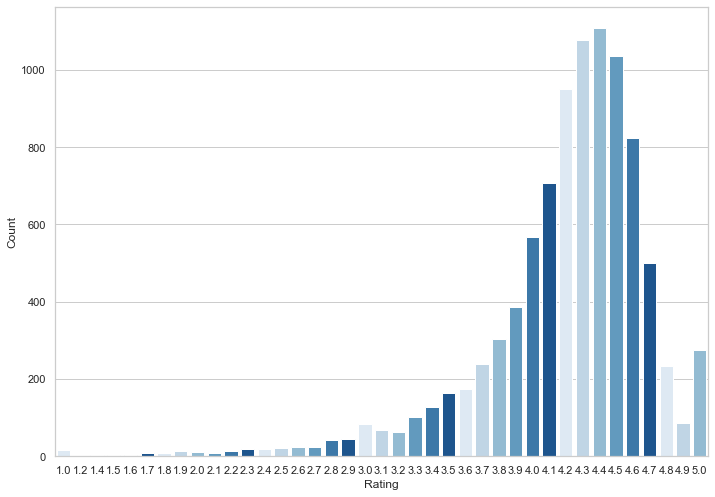

In [277]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='Rating', data=df, palette=sns.color_palette('Blues'))
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

Displaying the rating frequency of the app

From the figure above, it shows that most of the apps are within the rating range of 4.0-4.7. This is a relatively high rating range for the apps

In [279]:
#Calculating the mean rating for the apps in the Play Store

C = inp3['Rating'].mean()

print(C)

4.136260897642881


In [280]:
inp3['Category'].head()

0    ART_AND_DESIGN
1    ART_AND_DESIGN
4    ART_AND_DESIGN
5    ART_AND_DESIGN
6    ART_AND_DESIGN
Name: Category, dtype: object

In [281]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['Category'] = inp3['Category'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(inp3['Category'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(6194, 33)

In [282]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [284]:
#Construct a reverse map of indices and app titles
indices = pd.Series(inp3.index, index=inp3['App']).drop_duplicates()

In [285]:
# Function that takes in app title as input and outputs most similar app
def get_recommendations(app, cosine_sim=cosine_sim):
    # Get the index of the app that matches the title
    idx=indices[app]

    # Get the pairwsie similarity scores of all apps with that app
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the apps based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar apps
    sim_scores = sim_scores[1:26]

    # Get the app indices
    app_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar apps
    return inp3['App'].iloc[app_indices]

In [286]:
get_recommendations('Garden Coloring Book')

1                                 Coloring book moana
4               Pixel Draw - Number Art Coloring Book
5                          Paper flowers instructions
6             Smoke Effect Photo Maker - Smoke Editor
7                                    Infinite Painter
8                                Garden Coloring Book
9                       Kids Paint Free - Drawing Fun
10                            Text on Photo - Fonteee
11            Name Art Photo Editor - Focus n Filters
13                              Mandala Coloring Book
14    3D Color Pixel by Number - Sandbox Art Coloring
16       Photo Designer - Write your name with shapes
17                           350 Diy Room Decor Ideas
20                        Logo Maker - Small Business
21          Boys Photo Editor - Six Pack & Men's Suit
22            Superheroes Wallpapers | 4K Backgrounds
24                        HD Mickey Minnie Wallpapers
25                         Harley Quinn wallpapers HD
26                      Colo

This recommender system retrieves the top 15 apps based on the cosise similarity scores using TF-IDF vectorization. The app 'Garden Coloring Book' which was input, as the name suggests, is an art app. The recommender effectively retrieves apps in the top that mostly belong to art and design category.